In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import japanize_matplotlib

def prediction(learning_rate,data):#学習結果からdataに対して予測をする．
    """
    learning_rate:学習モデル
    data:予測を行いたいデータ
    """
    calc_predict = learning_rate.predict_proba(data)#予測確率の計算
    #print(calc_predict)
    max_predict = np.max(calc_predict,axis=1)#最も確率の高いものを指定
    label_prediction = learning_rate.predict(data)#予測ラベルの取得
    return max_predict,label_prediction

def learning_model(x_train,y_train,c):#学習データからロジスティック回帰モデルを学習する．
    """
    x_train:特徴量抽出済のtrainデータ
    y_trai:特徴量抽出前のカテゴリのみ
    c:ロジスティック回帰モデルの正則化パラメーター
    """
    learning_rate = LogisticRegression(penalty='none',random_state=2146047, max_iter=1000,C=c)
    learning_rate.fit(x_train,y_train)#モデルlearning_rateを適合させる
    model_name = f"logistic_{str(c)}.pkl"
    with open (model_name,"wb") as f:#wb:バイナリファイルへの書き込み
        pickle.dump(learning_rate,f)
    return learning_rate

def open_model(c):#正則化パラメーターcと紐付けて保存したモデルを読み込む．
    model_name = f"logistic_{str(c)}.pkl"
    try:
        with open(model_name, "rb") as f:
            model = pickle.load(f)
    except EOFError:#空ファイルを指定していたら
        print(f"{model_name}でエラーになりました．")
        model = None
    return model

In [15]:
train = pd.read_table("train.txt")
valid = pd.read_table("valid.txt")
test = pd.read_table("test.txt")
x_train = pd.read_table("train.feature.txt")
x_valid = pd.read_table("valid.feature.txt")
x_test = pd.read_table("test.feature.txt")
y_train = pd.read_table("train.txt")["CATEGORY"]
y_valid = pd.read_table("valid.txt")["CATEGORY"]
y_test = pd.read_table("test.txt")["CATEGORY"]

c_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
train_ans,valid_ans,test_ans = [],[],[]#各正解率をここに保存していく


In [17]:
for c in c_list:
    #learning_model(x_train,y_train,c)
    model = open_model(c)
    train_predict = prediction(model,x_train)
    valid_predict = prediction(model,x_valid)
    test_predict = prediction(model,x_test)

    #結果をリストに保存
    train_ans.append(accuracy_score(train["CATEGORY"], train_predict[1]))
    valid_ans.append(accuracy_score(valid["CATEGORY"], valid_predict[1]))
    test_ans.append(accuracy_score(test["CATEGORY"], test_predict[1]))

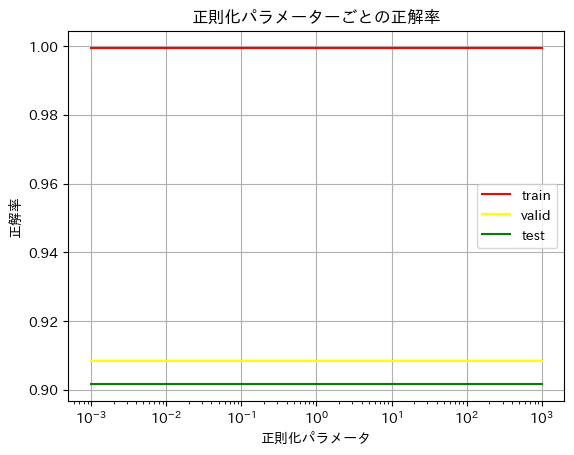

In [23]:
#グラフにまとめていく
fig,ax = plt.subplots()
answers = [train_ans,valid_ans,test_ans]
colors = ["red","yellow","green"]
labels = ["train","valid","test"]

ax.set_xlabel("正則化パラメータ")
ax.set_ylabel("正解率")
ax.set_title("正則化パラメーターごとの正解率")
ax.set_xscale("log")
ax.grid()
for i in range (len(answers)):
    ax.plot(c_list,answers[i],color=colors[i],label=labels[i])
ax.legend(loc=0)#凡例の位置調整
fig.savefig("knock58.png")
